<a href="https://colab.research.google.com/github/yk-Jeong/AI_10th/blob/main/3%EC%A3%BC%EC%B0%A8_%EB%BF%85%EB%BF%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 0. 사전준비

In [148]:
import numpy as np # numpy import 
X = np.array([0, 0, 1, 1, 0, 1, 0, 1]).reshape(2,4) # 입력
Y = np.array([0, 1, 1, 0]).reshape(1,4) # 정답 

print(X)
print(Y)

[[0 0 1 1]
 [0 1 0 1]]
[[0 1 1 0]]


In [149]:
# 가중치 초기화 함수
def init_parameters(num_hidden_units = 2):
  W1 = np.random.randn(2, num_hidden_units) # 첫번째 레이어 가중치
  B1 = np.zeros((num_hidden_units,1)) # 첫번째 레이어 바이어스
  # ------ ↑첫 번째 레이어, ↓두 번째 레이어
  W2 = np.random.randn(num_hidden_units, 1) # 두번째 레이어 가중치
  B2 = np.zeros((1, 1)) # 두번째 레이어의 바이어스
  return W1, B1, W2, B2 # 가중치 파라미터 리턴

In [150]:
init_parameters(2)

(array([[-0.11564828, -0.3011037 ],
        [-1.47852199, -0.71984421]]),
 array([[0.],
        [0.]]),
 array([[-0.46063877],
        [ 1.05712223]]),
 array([[0.]]))

1) 어파인 변환 연산과 시그모이드 활성화 함수 만들기 

In [151]:
# Affine transform을 구현하세요.
def affine(W, X, B):
  return np.dot(W.T, X) + B

# sigmoid function을 구현하세요.
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

In [152]:
# 임의로 w, b, x를 만들고 affine 함수를 테스트 해봅니다
w = np.arange(4).reshape(2,2)
b = [[1],[2]]
x = [[1],[1]]

print(affine(w, x, b)) # affine test -> [[3],[6]] 
print(sigmoid(0.1)) # sigmoide test -> 0.524979

[[3]
 [6]]
0.52497918747894


2) 손실함수 만들기 : 이진 크로스 엔트로피

In [153]:
def binary_cross_entropy(Y, YHat):
  N = Y.shape[1] # 총 샘플의 수
  loss = -1/N * np.sum(Y * np.log(YHat)+ (1 - Y)*np.log(1 - YHat)) 
  return loss

In [154]:
# 정답 확인
Y = np.array([0, 1, 1, 0]).reshape(1, 4) # 정답
YHat = np.array([0.5, 0.5, 0.5, 0.5]).reshape(1, 4) # 추값

loss = binary_cross_entropy(Y, YHat)
print("2진 크로스엔트로피 비용:", loss)

2진 크로스엔트로피 비용: 0.6931471805599453


3) 2레이어 뉴럴네트워크 순방향 연산 구현하기



In [155]:
def forward_loss(X, Y, _params):
  W1, B1, W2, B2 = _params 

  # 첫번째 레이어연산
  Z1 = np.dot(W1.T, X) + B1
  H = 1 / (1 + np.exp(-Z1))

  # 두번째 레이어 연산
  Z2 = np.dot(W2.T, H) + B2
  YHat = 1 / (1 + np.exp(-Z2))

  # 손실함수 계산
  N = YHat.shape[1]
  loss = -1/N * np.sum(Y * np.log(YHat)+ (1 - Y)*np.log(1 - YHat)) 

  return Z1, H, Z2, YHat, loss

In [156]:
np.random.seed(42) # random seed로 고정
W1, B1, W2, B2 = init_parameters(num_hidden_units = 2) # 파라미터 초기화
forward_loss(X, Y, [W1, B1, W2, B2])[-1] # loss출력 : 0.70492209

0.7049220984497544

4) 2레이어 뉴럴네트워크의 역방향 그레디언트 계산하기

In [157]:
def get_gradients(X, Y, _params):
  W1, B1, W2, B2 = _params
  m = X.shape[1] # 샘플의 수
  # 포워드 함수 통과 후 출력 
    # - Z1 : 첫번재 레이어 affine 결과
    # - H : 첫번재 레이어 sigmoid 통과한 결과
    # - Z2 : 두번재 레이어 affine 통과한 결과
    # - YHat : 두번재 레이어 sigmoid 통과한 결과
    # - loss : 크로스엔트로피 손실값 
  Z1, H, Z2, YHat, loss = forward_loss(X, Y, _params) 

  # 1) dLoss/dZ2 구현. 손실함수가 각 샘플 손실의 평균으로 계산되기 때문에 그대로 구현하였습니다. 
  dLdZ2 = (1 / m)*(YHat - Y) # 그림에서 1의 구현

  # 2) dLoss/dW2의 구현 - '...'을 구현하세요. 
  dLdW2 = np.dot(H, dLdZ2.T) # 그림에서 2의 구현 (초록색 2번 참고)

  # 3) dLoss/dB2의 구현 - 샘플마다 gradient가 있음. 따라서 합쳐줘야 함.  
  dLdB2 = np.sum(dLdZ2, axis=1, keepdims=True) # 그림에서 3의 구현

  # 4) dLoss/dH의 구현 - '...'을 구현하세요.
  dLdH = np.dot(W2, dLdZ2) #  그림에서 4의 구현 

  # 5) dLoss/dZ1의 구현 - '...'을 구현하세요.
  dLdZ1 = dLdH * H *(1 - H) # 그림에서 5의 구현 

  # 6) dLoss/dW1의 구현 - '...'을 구현하세요.
  dLdW1 = np.dot(X, dLdZ1.T) # 그림에서 6의 구현 

  # 7) dLoss/dB2의 구현 - '...'을 구현하세요.
  dLdB1 = np.sum(dLdZ1, axis=1, keepdims=True)

  return [dLdW1, dLdB1, dLdW2, dLdB2], loss

## 시그모이드 함수의 미분

시그모이드의 도함수는 $\sigma(x)\cdot(1-\sigma(x))$ 이므로, 이 값이 0 또는 1에 가까울수록 출력값도 0에 가까워지게 된다. 

즉 뉴런의 기울기 값이 0에 수렴하므로, 역전파 시 0이 곱해지면서 기울기가 소실한다. 이로 인해 결과적으로 다음 층에 아무런 정보가 전달되지 않게 되는 문제점이 있기 때문이다.

학습하기 

In [158]:
def optimize (X, Y, _params, learning_rate = 0.1, iteration = 1000):

    params = np.copy(_params) # 파라미터 복사
    loss_trace = [] # 손실 값 저장 

    for epoch in range(iteration): # 학습 반복 
        dparams, loss = get_gradients(X, Y, params) # 그레디언트 추출 
        for param, dparam in zip(params, dparams): 
            param += - learning_rate * dparam # 경사하강법 구현 

        if (epoch % 100 == 0): # 손실값 저장 
            loss_trace.append(loss)

    _, _, _, Y_hat_predict, _ = forward_loss(X, Y, params) # 학습된 모델로 추론 

    return params,loss_trace, Y_hat_predict

In [167]:
X = np.array([0, 0, 1, 1, 0, 1, 0, 1]).reshape(2,4) # 입력
Y = np.array([0, 1, 1, 0]).reshape(1,4) # 정답 

params = init_parameters(2) # 파라미터 세팅 
new_params, loss_trace, Y_hat_predict = optimize(X, Y, params, 0.1, 150000) # 학습 및 추론 

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:935: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, order=order, subok=subok, copy=True)


[[0.000555 0.999424 0.999425 0.000861]]


In [166]:
# 지수표기(e)를 숫자로 변환하기 위한 코드를 추가하였음

import pandas as pd

np.set_printoptions(precision=6, suppress=True) 
pd.options.display.float_format = '{:.5f}'.format
pd.reset_option('display.float_format')

In [169]:
# Y = [0 1 1 0] 이었으므로 Y값에 근사함
Y_hat_predict

array([[0.000555, 0.999424, 0.999425, 0.000861]])

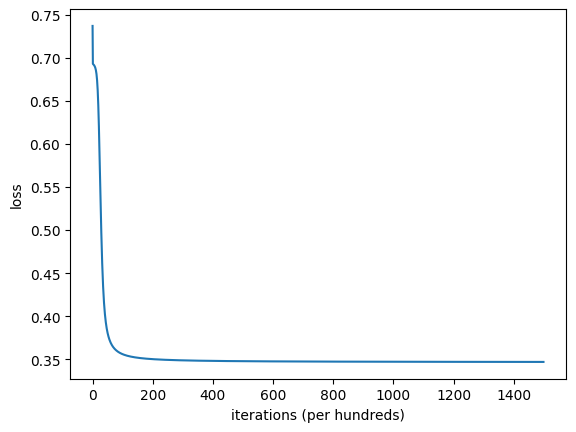

In [160]:
import matplotlib.pyplot as plt

# Plot learning curve (with costs)
plt.plot(loss_trace)
plt.ylabel('loss')
plt.xlabel('iterations (per hundreds)')
plt.show()